# 0. Import and useful functions

## 0.1 Gam calc functions

In [18]:
from GAMcalc import *
import propagator 
import wignerD as wd
from scipy import optimize
from numpy.linalg import eig

## 0.2 Initialize sets of Ks

In [19]:
def set3Ks(K):
    k1 = np.array([1,0,0])*K
    k2 = np.array([-0.5,0.5*np.sqrt(3),0])*K
    k3 = -k1-k2
    return [k1, k2, k3]

def set4Ks1(K):
    k1=np.array([1,0,0])*K
    k2=np.array([1,0,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks2(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0.5,0.5*np.sqrt(3),0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks3(K):
    k1=np.array([1,0,0])*K
    k2=np.array([0,1,0])*K
    k3, k4 = -k1, -k2
    return [k1, k2, k3, k4]

def set4Ks4(K):
    k1=np.array([-1,0,1])/np.sqrt(2)*K
    k2=np.array([-1,0,-1])/np.sqrt(2)*K
    k3=np.array([1,1,0])/np.sqrt(2)*K
    k4=np.array([1,-1,0])/np.sqrt(2)*K
    return [k1, k2, k3, k4]

## 0.3 Plot power laws

In [20]:
def plotlog(x, y, alpha, xrange=1, numx=2, color='k', plt=plt):
    xv = np.logspace(np.log10(x), np.log10(x) + xrange, numx)
    C = y / (x**alpha)
    yv = C * xv**(alpha)
    plt.loglog(xv, yv, '--', color=color)

# 0.4 Minimizing functions

In [245]:
def chis(pset, N, FA):
    Ks = spinodal(pset, N, FA)
    chis = gamma2(pset, N, FA, Ks, 0).real*N/2
    
    return chis

In [21]:
def gamma2sol_biggereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS):
    gam2sol = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    eigv, eigvec = eig(gam2sol)
    return eigv.max().real, eigvec[:,eigv.argmax()].real

In [22]:
def gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS):
    gam2sol = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    eigv, eigvec = eig(gam2sol)
    return eigv.min().real, eigvec[:,eigv.argmin()].real

In [23]:
def gamma2sol_mineig(pset, N, FA, PHIP, CHIAB, CHIAS, CHIBS):
    f = lambda K: gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)[0]
    Ks = optimize.fmin(f, 1/np.sqrt(r2(N)), disp=False)
    _, eigvmin = gamma2sol_smallereig(pset, N, FA, PHIP, Ks,
                                   CHIAB, CHIAS, CHIBS)
    
    return f(Ks), Ks, eigvmin

In [24]:
def gamma2sol_spinodal(pset, N, FA, PHIP):
    CHIAB = 5/N/PHIP
    # check this, this seems to effect the initialization of the below solving for eqn.
    
    CHIAS, CHIBS = 0, 0
    f = lambda CHIAB: gamma2sol_mineig(pset, N, FA, PHIP, CHIAB, CHIAS, CHIBS)[0]
    CHIABs = optimize.newton(f, 1/N)
    
    # find Ks at spinodal
    _, Kss, _ = gamma2sol_mineig(pset, N, FA, PHIP, CHIAB, CHIAS, CHIBS)
    return CHIABs, Kss

# 1. Melt vertices

## 1.1 Simple examples

In [ ]:
N = 10
FA = 0.5
K = 10
CHI = 0

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
Ks3 = set3Ks(KS)
Ks4 = set4Ks(KS)

print(gamma2(pset, N, FA, K, CHI))
print(gamma3(pset, N, FA, Ks3))
print(gamma4(pset, wigset, N, FA, Ks4))

## 1.2 Vertices at all qs

### 1.2.1 Gamma2 at all q

In [ ]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

In [ ]:
plt.loglog(KV, 1/gam2.real)
plt.show()

### 1.2.2 Gamma3 at all q

In [ ]:
N=10
FA=0.2

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam3 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set3Ks(K)
    gam3[i] = gamma3(pset, N, FA, Ks)

In [ ]:
plt.loglog(KV, -gam3.real)
plt.loglog(KV, gam3.real)
plt.show()

### 1.2.3 Gamma4 at all q

In [ ]:
N=10
FA=0.2

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()
KV = np.logspace(-1,3,20)
gam4 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    print(K)
    Ks = set4Ks(K)
    gam4[i] = gamma4(pset, wigset, N, FA, Ks)

In [ ]:
plt.loglog(KV, gam4.real)
plt.loglog(KV, -gam4.real)
plt.show()

## 1.3 Vertices at q*

### 1.3.1 Gamma2 and find q*

In [ ]:
N=10
FA=0.5
CHI = 0

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2 = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2[i] = gamma2(pset, N, FA, K, CHI)

In [ ]:
plt.loglog(KV, 1/gam2.real)
plt.show()

In [ ]:
FA = 0.5
NV = np.logspace(-1, 4, 10)
KSV = np.zeros((len(NV)))

for ind, N in enumerate(NV):
    KSV[ind] = spinodal(pset, N, FA)

In [ ]:
plt.loglog(NV, 1/KSV)
plt.show()

### 1.3.2 Gamma3 at q*

In [ ]:
FAV = np.linspace(.2, .5, 21)
pset=propagator.prop_set(nlam=10)

N = 1000
GAM3N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1000[ind] = gamma3(pset, N, FA, Ks)*N

N = 100
GAM3N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N100[ind] = gamma3(pset, N, FA, Ks)*N

N = 1
GAM3N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set3Ks(spinodal(pset, N, FA))
    GAM3N_N1[ind] = gamma3(pset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, -GAM3N_N1000.real, label='N=1000')
plt.plot(FAV, -GAM3N_N100.real, label='N=100')
plt.plot(FAV, -GAM3N_N1.real, label='N=1')
plt.xlabel('$f_A$')
plt.ylabel('$-N\Gamma_{3}(q^*)$')
plt.legend(loc=1)
plt.axis([.2,.5,0,200])
plt.show()

### 1.3.3 Gamma4 at q*

In [ ]:
FAV = np.linspace(.3, .5, 21)
pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

N = 1000
GAM4N_N1000 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1000[ind] = gamma4(pset, wigset, N, FA, Ks)*N

N = 100
GAM4N_N100 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N100[ind] = gamma4(pset, wigset, N, FA, Ks)*N

    
N = 10
GAM4N_N10 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N10[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    
N = 1
GAM4N_N1 = np.zeros((len(FAV)), dtype='complex')
for ind, FA in enumerate(FAV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    GAM4N_N1[ind] = gamma4(pset, wigset, N, FA, Ks)*N

In [ ]:
plt.plot(FAV, GAM4N_N1000.real, label='N=1000')
plt.plot(FAV, GAM4N_N100.real, label='N=100')
plt.plot(FAV, GAM4N_N10.real, label='N=10')
plt.plot(FAV, GAM4N_N1.real, label='N=1')
plt.axis([.3,.5,100,500])
plt.box
plt.legend(loc=1)
plt.show()

## 1.3 Plot free energy

In [25]:
def FE1(A, CHI, gam41):
    pi = 3.14159
    a = -(2*pi)**(-3)*2*CHI
    b = 0
    c = (2*pi)**(-9)*(1/4)*gam41.real

    return a*A**2 + b*A**3 + c*A**4

def FE3(A, CHI, gam3, gam41, gam42):
    pi = 3.14159
    a = -(2*pi)**(-3)*2*CHI
    b = (2*pi)**(-6)*(2/3/np.sqrt(3))*gam3.real
    c = (2*pi)**(-9)*(1/12)*(gam41+4*gam42).real
    
    return a*A**2 + b*A**3 + c*A**4

def FE6(A, CHI, gam3, gam41, gam42, gam43, gam44):
    pi = 3.14159
    a = -(2*pi)**(-3)*2*CHI
    b = (2*pi)**(-6)*(4/3/np.sqrt(6))*gam3.real
    c = (2*pi)**(-9)*(1/24)*(gam41+8*gam42+2*gam43+4*gam44).real
    
    return a*A**2 + b*A**3 + c*A**4

### Calculate free energies

In [26]:
N = 100
FA = 0.3

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()
Ks = spinodal(pset, N, FA)

# calculate vertices
gam3 = gamma3(pset, N, FA, set3Ks(Ks)).real
gam41 = gamma4(pset, wigset, N, FA, set4Ks1(Ks)).real
gam42 = gamma4(pset, wigset, N, FA, set4Ks2(Ks)).real
gam43 = gamma4(pset, wigset, N, FA, set4Ks3(Ks)).real
gam44 = gamma4(pset, wigset, N, FA, set4Ks4(Ks)).real

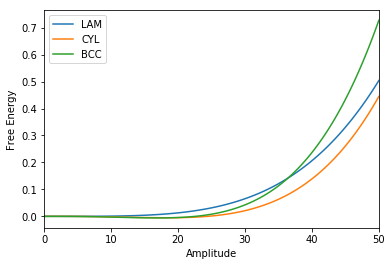

In [27]:
CHI = 0/N
AV = np.linspace(0, 50, 100)

plt.plot(AV, FE1(AV, CHI, gam41), label='LAM')
plt.plot(AV, FE3(AV, CHI, gam3, gam41, gam42), label='CYL')
plt.plot(AV, FE6(AV, CHI, gam3, gam41, gam42, gam43, gam44), label='BCC')
plt.xlabel('Amplitude')
plt.ylabel('Free Energy')
plt.legend()
# plt.axis([0,50,-0.1,0.2])
plt.xlim([0,50])
plt.show()

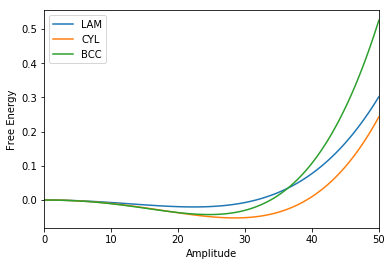

In [28]:
CHI = 1/N
AV = np.linspace(0, 50, 100)

plt.plot(AV, FE1(AV, CHI, gam41), label='LAM')
plt.plot(AV, FE3(AV, CHI, gam3, gam41, gam42), label='CYL')
plt.plot(AV, FE6(AV, CHI, gam3, gam41, gam42, gam43, gam44), label='BCC')
plt.xlabel('Amplitude')
plt.ylabel('Free Energy')
plt.legend()
# plt.axis([0,50,-0.1,0.2])
plt.xlim([0,50])
plt.show()

In [29]:
print('LAM FE')
print(optimize.fmin(lambda A: FE1(A, CHI, gam41),
                    1, disp=False, full_output=1))
print('CYL FE')
print(optimize.fmin(lambda A: FE3(A, CHI, gam3, gam41, gam42),
                    1e-1, disp=False, full_output=1))

LAM FE
(array([ 22.36132813]), -0.020158468339313139, 25, 50, 0)
CYL FE
(array([ 28.48085938]), -0.052295153023099353, 30, 60, 0)


### Make phase diagrams

In [10]:
def chioot(N, FA):
    pset=propagator.prop_set(nlam=5)
    wigset = wd.wigner_d_vals()
    Ks = spinodal(pset, N, FA)
    
    # calculate vertices
    gam3 = gamma3(pset, N, FA, set3Ks(Ks)).real
    gam41 = gamma4(pset, wigset, N, FA, set4Ks1(Ks)).real
    gam42 = gamma4(pset, wigset, N, FA, set4Ks2(Ks)).real
    gam43 = gamma4(pset, wigset, N, FA, set4Ks3(Ks)).real
    gam44 = gamma4(pset, wigset, N, FA, set4Ks4(Ks)).real
    
    # calculate oot temperatures
    A0 = 1e-1
    FE13 = lambda CHI: \
    optimize.fmin(lambda A: FE1(A, CHI, gam41),
                  A0, disp=False, full_output=1)[1] - \
    optimize.fmin(lambda A: FE3(A, CHI, gam3, gam41, gam42),
                  A0, disp=False, full_output=1)[1]
    
    FE36 = lambda CHI: \
    optimize.fmin(lambda A: FE3(A, CHI, gam3, gam41, gam42),
                  A0, disp=False, full_output=1)[1] -\
    optimize.fmin(lambda A: FE6(A, CHI, gam3, gam41, gam42, gam43, gam44),
                  A0, disp=False, full_output=1)[1]
    
    chi13 = optimize.ridder(FE13, 0, 100/N)
    chi36 = optimize.ridder(FE36, 0, 100/N)
    
    return chi13, chi36

In [251]:
N = 100
FAV = np.linspace(.10, .48, 21)
CHIsV = np.zeros((len(FAV), 1))
CHI13V = np.zeros((len(FAV), 1))
CHI36V = np.zeros((len(FAV), 1))

for i, FA in enumerate(FAV):
    CHIsV[i] = chis(pset, N, FA)
    CHI13V[i], chi36V[i] = chioot(N, FA)
    print(N, FA, CHIsV[i], CHI13V[i], CHI36V[i])

NameError: name 'chi36V' is not defined

## 1.4 Look at UV divergence

### First N = 1000

In [ ]:
N = 1000
FA = 0.5

normK = 1  # equals 2lp if =1
# normK = np.sqrt(N/6)
# KV = np.logspace(-1, 2, 201)/normK
KV = np.linspace(1e-2, 0.5, 1001)/normK
p = KV*normK
CHI = 10/N

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

KS = spinodal(pset, N, FA)
GAM4N1 = np.zeros((len(KV),), dtype='complex')
GAM2 = np.zeros((len(KV),), dtype='complex')
for ii, K in enumerate(KV):
    Ks41 = set4Ks1(K)
    GAM4N1[ii] = gamma4(pset, wigset, N, FA, Ks41)
    GAM2[ii] = gamma2(pset, N, FA, K, CHI)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4.5))
ax1.loglog(p, 1./GAM2.real, '-', color='r')
ax1.set_xlabel('$2l_{p}q$')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('$1/\Gamma{2}$', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.loglog(p, GAM4N1.real, 'b-')
ax2.set_ylabel('$\Gamma_{4}$', color='b')
ax2.tick_params('y', colors='b')

# add power laws
plotlog(6e-1, 1.5e1, -2, xrange=0.5, color='r', plt=ax1)
plotlog(6e-1, 3e0, 2, xrange=0.4, color='b', plt=ax2)
plotlog(5e1, 2.5e-2, -1, xrange=0.5, color='r', plt=ax1)
plotlog(5e1, 9e2, 1, xrange=0.5, color='b', plt=ax2)

plt.xlim(0.1,1e2)
fig.tight_layout()
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/GAMsN'+str(N)+'.eps')

In [ ]:
# Brazovskii approx.
KSs41 = set4Ks1(KS)
GAM4KS = gamma4(pset, wigset, N, FA, KSs41)
pS = KS*normK
braz = pS**2*GAM4KS.real/GAM2.real

In [ ]:
plt.figure(figsize=(6,4.5))
plt.loglog(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.loglog(p, braz, 'k-.', label='Brazovskii approx.')
plt.axis([0.1,1e2,1e-5,1e6])
plotlog(50,5e4,2)
plotlog(6e-1,1.5e1,2,xrange=0.4)
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/BrazN'+str(N)+'.eps')

In [ ]:
plt.figure(figsize=(6,4.5))
plt.plot(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.plot(p, braz, 'k--', label='Brazovskii approx.')
plt.axis([0.1,0.5,0,5])
plt.title('N='+str(N))
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.legend()
# plt.show()
plt.savefig('figs/Braz2N'+str(N)+'.eps')

### Consider N = 1

In [ ]:
N = 1
FA = 0.5
KS = spinodal(pset, N, FA)

normK = 1  # equals 2lp if =1
# normK = np.sqrt(N/6)
KV = np.linspace(1e-2, 20, 501)/normK
# KV = np.logspace(-1, 2, 201)/normK
p = KV*normK
CHI = 6/N

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()

GAM4N1 = np.zeros((len(KV),), dtype='complex')
GAM2 = np.zeros((len(KV),), dtype='complex')
for ii, K in enumerate(KV):
    print(ii)
    Ks41 = set4Ks1(K)
    GAM4N1[ii] = gamma4(pset, wigset, N, FA, Ks41)
    GAM2[ii] = gamma2(pset, N, FA, K, CHI)

In [ ]:
fig, ax1 = plt.subplots(figsize=(6,4.5))
ax1.loglog(p, 1./GAM2.real, '-', color='r')
ax1.set_xlabel('$2l_{p}q$')

# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('$1/\Gamma{2}$', color='r')
ax1.tick_params('y', colors='r')

ax2 = ax1.twinx()
ax2.loglog(p, GAM4N1.real, 'b-')
ax2.set_ylabel('$\Gamma_{4}$', color='b')
ax2.tick_params('y', colors='b')

# add power laws
plotlog(5e1, 2.5e-2, -1.05, xrange=0.5, color='r', plt=ax1)
plotlog(5e1, 1.4e3, 1, xrange=0.5, color='b', plt=ax2)

plt.xlim(0.1,1e2)
fig.tight_layout()
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/GAMsN'+str(N)+'.eps')

In [ ]:
# Brazovskii approx.
KSs41 = set4Ks1(KS)
GAM4KS = gamma4(pset, wigset, N, FA, KSs41)
pS = KS*normK
braz = pS**2*GAM4KS.real/GAM2.real

In [ ]:
plt.figure(figsize=(6,4.5))
plt.loglog(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.loglog(p, braz, 'k-.', label='Brazovskii approx.')
plt.axis([0.1,1e2,1e-1,1e6])
plotlog(50,6e4,2)
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
# plt.show()
plt.savefig('figs/BrazN'+str(N)+'.eps')

In [ ]:
plt.figure(figsize=(6,4.5))
plt.plot(p, p**2*GAM4N1.real/GAM2.real, 'k-', label='exact integrand')
plt.plot(p, braz, 'k--', label='Brazovskii approx.')
plt.axis([0.1,20,0,2e4])
plt.legend()
plt.xlabel('$2l_{p}q$')
plt.ylabel('Integrand')
plt.title('N='+str(N))
plt.legend()
# plt.show()
plt.savefig('figs/Braz2N'+str(N)+'.eps')

## Check numerical convergence 

In [ ]:
# NV = np.logspace(0,3,11)
NV = [1e3]
G4N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=1)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

In [ ]:
NV = np.logspace(0,3,11)
G4N = np.zeros((len(NV)), dtype='complex')
S3N = np.zeros((len(NV)), dtype='complex')
FA = 0.5

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

for ind, N in enumerate(NV):
    Ks = set4Ks1(spinodal(pset, N, FA))
    G4N[ind] = gamma4(pset, wigset, N, FA, Ks)*N
    print(N, G4N[ind])

In [ ]:
plt.semilogx(NV, G4N)
plt.show()

## Write to file

In [ ]:
# Figure 1 data

filename = 'data/fig1data'
f1 = open(filename, 'w')

FAV = [0.5]
# NV = np.logspace(-1,3,81)
NV = [1, 2, 4, 10, 20, 40, 100, 200, 400, 1000]

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks41 = set4Ks1(KS)
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        f1.write(' %.4f, %.2f, %.2f, %.4f\n' %(N, FA, 0, GAM4N1[ii][jj].real))
        print(' %.4f, %.2f, %.2f, %.4f' %(N, FA, 0, GAM4N1[ii][jj].real))
f1.close()

In [ ]:
# Figure 2 data

filename = 'data/fig2data'
f2 = open(filename, 'w')

FAV = np.linspace(0.1,0.5,41)
NV = [100,50,10]

pset=propagator.prop_set(nlam=3)
wigset = wd.wigner_d_vals()

GAM3N = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N1 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N2 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N3 = np.zeros((len(NV), len(FAV)), dtype='complex')
GAM4N4 = np.zeros((len(NV), len(FAV)), dtype='complex')
for ii, N in enumerate(NV):
    for jj, FA in enumerate(FAV):
        KS = spinodal(pset, N, FA)
        
        Ks3 = set3Ks(KS)
        Ks41 = set4Ks1(KS)
        Ks42 = set4Ks2(KS)
        Ks43 = set4Ks3(KS)
        Ks44 = set4Ks4(KS)
        
        GAM3N[ii][jj] = gamma3(pset, N, FA, Ks3)*N
        GAM4N1[ii][jj] = gamma4(pset, wigset, N, FA, Ks41)*N
        GAM4N2[ii][jj] = gamma4(pset, wigset, N, FA, Ks42)*N
        GAM4N3[ii][jj] = gamma4(pset, wigset, N, FA, Ks43)*N
        GAM4N4[ii][jj] = gamma4(pset, wigset, N, FA, Ks44)*N
        f2.write(' %.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f\n' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
        print('%.2f, %.2f, %.4f, %.4f, %.4f, %.4f, %.4f' %(N, FA, 
                                           GAM3N[ii][jj].real, 
                                           GAM4N1[ii][jj].real, GAM4N2[ii][jj].real,
                                           GAM4N3[ii][jj].real, GAM4N4[ii][jj].real))
f2.close()

# 3. Solution vertices

## 3.1 Vertices at all qs

### 3.1.1 Gamma2 at all q

In [21]:
N=100
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    gam2sol[i] = gamma2sol(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

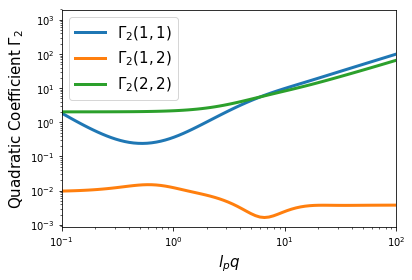

In [22]:
plt.loglog(KV, gam2sol[..., 0, 0].real, label='$\Gamma_2(1,1)$', linewidth=3)
plt.loglog(KV, gam2sol[..., 0, 1].real, label='$\Gamma_2(1,2)$', linewidth=3)
plt.loglog(KV, gam2sol[..., 1, 1].real, label='$\Gamma_2(2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlim(1e-1,1e2)
# plt.ylim(1e-3,1e3)
plt.xlabel('$l_{p}q$', fontsize=15)
plt.ylabel('Quadratic Coefficient $\Gamma_{2}$', fontsize=15)
# plt.show()
plt.savefig('figs/gam21.eps')

### 3.1.2 Gamma3 at all q

In [ ]:
N=100
FA=0.2
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
gam3sol = np.zeros((len(KV), 2, 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set3Ks(K)
    gam3sol[i] = gamma3sol(pset, N, FA, PHIP, Ks)

In [ ]:
plt.loglog(KV, -gam3sol[..., 0, 0, 0].real, label='$-\Gamma_3(1,1,1)$', linewidth=3)
plt.loglog(KV, -gam3sol[..., 0, 0, 1].real, label='$-\Gamma_3(1,1,2)$', linewidth=3)
plt.loglog(KV, -gam3sol[..., 1, 1, 1].real, label='$-\Gamma_3(2,2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlim(1e-1,1e2)
# plt.ylim(1e-1,1e3)
plt.xlabel('$l_{p}q$', fontsize=15)
plt.ylabel('Cubic Coefficient $-\Gamma_{3}$', fontsize=13)
# plt.show()
plt.savefig('figs/gam31.eps')

### 3.1.3 Gamma4 at all q

In [ ]:
N=100
FA=0.2
PHIP = 0.5

pset=propagator.prop_set(nlam=2)
wigset = wd.wigner_d_vals()
KV = np.logspace(-1,3,100)
gam4sol = np.zeros((len(KV), 2, 2, 2, 2),dtype=type(1+1j))
for i, K in enumerate(KV):
    Ks = set4Ks(K)
    gam4sol[i] = gamma4sol(pset, wigset, N, FA, PHIP, Ks)

In [ ]:
plt.loglog(KV, gam4sol[..., 0, 0, 0, 0].real, label='$\Gamma_4(1,1,1,1)$', linewidth=3)
plt.loglog(KV, gam4sol[..., 0, 0, 1, 1].real, label='$\Gamma_4(1,1,2,2)$', linewidth=3)
plt.loglog(KV, gam4sol[..., 1, 1, 1, 1].real, label='$\Gamma_4(2,2,2,2)$', linewidth=3)
plt.legend(fontsize=15)
plt.xlim(1e-1,1e2)
# plt.ylim(1e-1,1e3)
plt.xlabel('$l_{p}q$', fontsize=13)
plt.ylabel('Quartic Coefficient $\Gamma_{4}$', fontsize=15)
# plt.show()
plt.savefig('figs/gam41.eps')

## Spinodals of diblock copolymer in solution

In [46]:
N=100
FA=0.2
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
# gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
mineig = np.zeros((len(KV), 1),dtype=type(1+1j))
maxeig = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    maxeig[i], _ = gamma2sol_biggereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    mineig[i], _ = gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

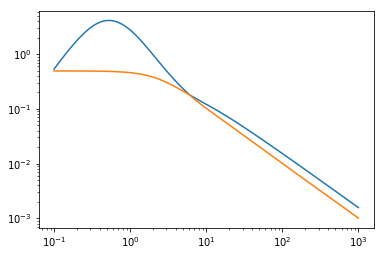

In [47]:
plt.loglog(KV, 1./mineig.real)
plt.loglog(KV, 1./maxeig.real)
# plt.loglog(KV, 1./mineig.imag)
# plt.loglog(KV, abs(1./maxeig))
# plt.axis([1e-1,1e3,1e-3,1])
plt.show()

In [81]:
N=1
FA=0.2
CHIAB, CHIAS, CHIBS = 5/N/PHIP, 0, 0
PHIP = 0.5

pset=propagator.prop_set(nlam=1)
KV = np.logspace(-1,3,100)
# gam2sol = np.zeros((len(KV), 2, 2),dtype=type(1+1j))
mineig = np.zeros((len(KV), 1),dtype=type(1+1j))
maxeig = np.zeros((len(KV), 1),dtype=type(1+1j))
for i, K in enumerate(KV):
    maxeig[i], _ = gamma2sol_biggereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)
    mineig[i], _ = gamma2sol_smallereig(pset, N, FA, PHIP, K, CHIAB, CHIAS, CHIBS)

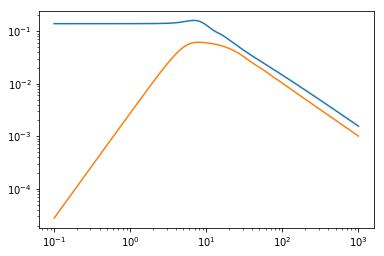

In [69]:
plt.loglog(KV, 1./mineig.real)
plt.loglog(KV, 1./maxeig.real)
# plt.loglog(KV, 1./mineig.imag)
# plt.loglog(KV, abs(1./maxeig))
# plt.axis([1e-1,1e3,1e-3,1])
plt.show()

## find spinodals

In [169]:
N=5
FA=0.5
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.99

pset=propagator.prop_set(nlam=1)

In [170]:
FAV = np.linspace(.1, .9, 21)
CHIABsV = np.zeros((len(FAV), 1))
KsV = np.zeros((len(FAV), 1))
for ind, FA in enumerate(FAV):
    CHIABsV[ind], KsV[ind] = gamma2sol_spinodal(pset, N, FA, PHIP)

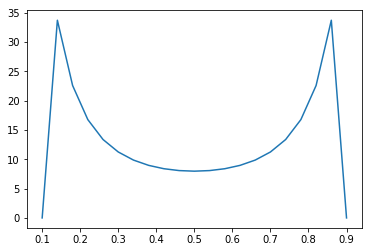

In [171]:
plt.plot(FAV, CHIABsV*N*PHIP)
plt.show()

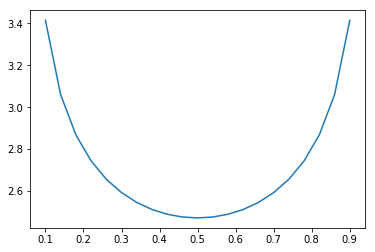

In [172]:
plt.plot(FAV, KsV)
plt.show()

## plot free energy

In [59]:
def FE1sol(A1, A2, CHIAB, gam41sol):
    # note here the amplitudes are in directions [1, 0] and [0, 1]
    # i.e. psi = [A1, A2]*sin(q*x)
    
    # calculate second order vertex
    CHIAS, CHIBS = 0, 0
    gam2sol = gamma2sol(pset, N, FA, PHIP, Ks, CHIAB, CHIAS, CHIBS).real
    
    pi = 3.14159
    FE = 0
    A = [A1, A2]
    for I1, I2 in product([0,1], repeat=2):
            FE += (2*pi)**(-3)*gam2sol[I1][I2]*A[I1]*A[I2]
            
    for I1, I2, I3, I4 in product([0,1], repeat=4):
        FE += (2*pi)**(-9)*(1/4)*\
        gam41sol[I1][I2][I3][I4]*A[I1]*A[I2]*A[I3]*A[I4].real
        
    return FE

def FE3sol(A1, A2, CHIAB, gam3sol, gam41sol, gam42sol):
    # calculate second order vertex
    CHIAS, CHIBS = 0, 0
    gam2sol = gamma2sol(pset, N, FA, PHIP, Ks, CHIAB, CHIAS, CHIBS).real
    
    pi = 3.14159
    FE = 0
    A = [A1, A2]
    for I1, I2 in product([0,1], repeat=2):
        FE += (2*pi)**(-3)*gam2sol[I1][I2]*A[I1]*A[I2]

    for I1, I2, I3 in product([0,1], repeat=3):
        FE += (2*pi)**(-6)*(2/3/np.sqrt(3))*gam3sol.real[I1][I2][I3]*\
        A[I1]*A[I2]*A[I3]
        
    for I1, I2, I3, I4 in product([0,1], repeat=4):
        FE += (2*pi)**(-9)*(1/12)*\
        (gam41sol[I1][I2][I3][I4]+4*gam42sol[I1][I2][I3][I4]).real*\
        A[I1]*A[I2]*A[I3]*A[I4]
        
    return FE

def FE6sol(A1, A2, gam2sol, gam3sol, gam41sol,
           gam42sol, gam43sol, gam44sol):
    # calculate second order vertex
    CHIAS, CHIBS = 0, 0
    gam2sol = gamma2sol(pset, N, FA, PHIP, Ks, CHIAB, CHIAS, CHIBS).real
    
    pi = 3.14159
    FE = 0
    A = [A1, A2]
    for I1, I2 in product([0,1], repeat=2):
        FE += (2*pi)**(-3)*gam2sol[I1][I2]*A[I1]*A[I2]

    for I1, I2, I3 in product([0,1], repeat=3):
        FE += (2*pi)**(-6)*(4/3/np.sqrt(6))*gam3sol.real[I1][I2][I3]*\
        A[I1]*A[I2]*A[I3]

    for I1, I2, I3, I4 in product([0], repeat=4):
        FE += (2*pi)**(-9)*(1/24)*\
        (gam41sol[I1][I2][I3][I4]+8*gam42sol[I1][I2][I3][I4]\
         +2*gam43sol[I1][I2][I3][I4]+4*gam44sol[I1][I2][I3][I4]).real*\
        A[I1]*A[I2]*A[I3]*A[I4]

    return FE

In [96]:
# make surface plot of free energy at fixed CHIAB
N=1000
FA=0.3
CHIAB, CHIAS, CHIBS = 0, 0, 0
PHIP = 0.5
CHIABs, _ = gamma2sol_spinodal(pset, N, FA, PHIP)

pset=propagator.prop_set(nlam=5)
wigset = wd.wigner_d_vals()

# find critical wavemode
_, Ks, eigvmin = gamma2sol_mineig(pset, N, FA, PHIP, CHIABs, CHIAS, CHIBS)
print(Ks, eigvmin)

gam3sol = gamma3sol(pset, N, FA, PHIP, set3Ks(Ks)).real
gam41sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks1(Ks)).real
gam42sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks2(Ks)).real
gam43sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks3(Ks)).real
gam44sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks4(Ks)).real

[ 0.15587997] [ 0.9999947  -0.00325725]


In [97]:
CHIAB = CHIABs + 1/N/PHIP

A1max, A2max = 60, 2
A1V = np.linspace(-A1max,A1max,100)
A2V = np.linspace(-A2max,A2max,100)
X, Y = np.meshgrid(A1V, A2V)
FE1V = np.zeros((len(A2V), len(A1V)))
FE3V = np.zeros((len(A2V), len(A1V)))
FE6V = np.zeros((len(A2V), len(A1V)))

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        A1 = X[i][j]
        A2 = Y[i][j]
        FE1V[i][j] = FE1sol(A1, A2, CHIAB, gam41sol)
        FE3V[i][j] = FE3sol(A1, A2, CHIAB, gam3sol,
                            gam41sol, gam42sol)
        FE6V[i][j] = FE6sol(A1, A2, CHIAB, gam3sol, 
                            gam41sol, gam42sol, gam43sol, gam44sol)

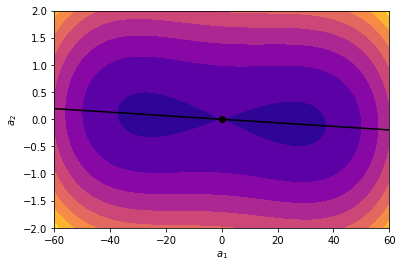

In [98]:
plt.contourf(X, Y, FE1V, cmap=plt.cm.plasma)

# plot eig. vector direction
plt.plot(0, 0, 'ko', zorder=1)
plt.plot(A1V, A1V*eigvmin[1]/eigvmin[0], 'k', zorder=1)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.show()

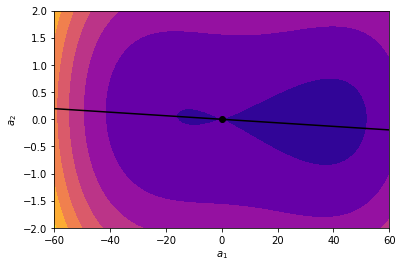

In [99]:
plt.contourf(X, Y, FE3V, cmap=plt.cm.plasma)

# plot eig. vector direction
plt.plot(0, 0, 'ko', zorder=1)
plt.plot(A1V, A1V*eigvmin[1]/eigvmin[0], 'k', zorder=1)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.show()

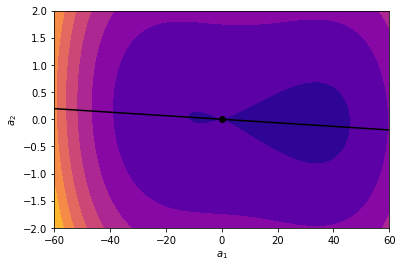

In [100]:
plt.contourf(X, Y, FE6V, cmap=plt.cm.plasma)

# plot eig. vector direction
plt.plot(0, 0, 'ko', zorder=1)
plt.plot(A1V, A1V*eigvmin[1]/eigvmin[0], 'k', zorder=1)
plt.xlabel('$a_{1}$')
plt.ylabel('$a_{2}$')
plt.show()

In [174]:
# energy landscape in the eigvec direction
CHIAB = 10/N/PHIP

Amax = 100
AeigV = np.linspace(-Amax,Amax,100)
FE1eigV = np.zeros((len(A1V), 1))
FE3eigV = np.zeros((len(A1V), 1))
FE6eigV = np.zeros((len(A1V), 1))
print(eigvmin)

for i, A in enumerate(AeigV):
    A1 = eigvmin[0]*A
    A2 = eigvmin[1]*A
    FE1eigV[i] = FE1sol(A1, A2, CHIAB, gam41sol)
    FE3eigV[i] = FE3sol(A1, A2, CHIAB, gam3sol, gam41sol, gam42sol)
    FE6eigV[i] = FE6sol(A1, A2, CHIAB, gam3sol, 
                        gam41sol, gam42sol, gam43sol, gam44sol)

Avec0 = [10, 10]
optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], CHIABs+CHIAB, gam41sol),
              Avec0, disp=False, full_output=1)[1] - \
optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                  gam3sol, gam41sol, gam42sol),
              Avec0, disp=False, full_output=1)[1]

[ 0.9999947  -0.00325725]


0.0086884983548373151

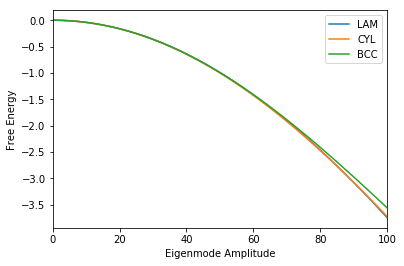

In [152]:
plt.plot(AeigV, FE1eigV, label='LAM')
plt.plot(AeigV, FE3eigV, label='CYL')
plt.plot(AeigV, FE6eigV, label='BCC')
# plt.axis([0,50,-0.01,0.02])
plt.xlim([0,100])
# plt.ylim([-.1,.1])
plt.xlabel('Eigenmode Amplitude')
plt.ylabel('Free Energy')
plt.legend()
plt.show()

### Make phase diagrams

In [191]:
def chiootsol(N, FA, PHIP):
    pset=propagator.prop_set(nlam=5)
    wigset = wd.wigner_d_vals()

    CHIAB, CHIAS, CHIBS = 0, 0, 0
    CHIABs, _ = gamma2sol_spinodal(pset, N, FA, PHIP)

    # find critical wavemode
    _, Ks, eigvmin = gamma2sol_mineig(pset, N, FA, PHIP, CHIAB, CHIAS, CHIBS)
    print(Ks, eigvmin)

    gam3sol = gamma3sol(pset, N, FA, PHIP, set3Ks(Ks)).real
    gam41sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks1(Ks)).real
    gam42sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks2(Ks)).real
    gam43sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks3(Ks)).real
    gam44sol = gamma4sol(pset, wigset, N, FA, PHIP, set4Ks4(Ks)).real
        
    # calculate oot temperatures
    Avec0 = [10,10]
    FE13sol = lambda CHIAB: \
    optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], CHIABs+CHIAB, gam41sol),
                  Avec0, disp=False, full_output=1)[1] - \
    optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                      gam3sol, gam41sol, gam42sol),
                  Avec0, disp=False, full_output=1)[1]
    
    FE36sol = lambda CHIAB: \
    optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                      gam3sol, gam41sol, gam42sol),
                  Avec0, disp=False, full_output=1)[1] - \
    optimize.fmin(lambda Avec: FE6sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                      gam3sol, gam41sol, gam42sol, gam43sol, gam44sol),
                  Avec0, disp=False, full_output=1)[1]
    
    chi13sol = optimize.ridder(FE13sol, 0/N/PHIP, 100/N/PHIP)
    chi36sol = optimize.ridder(FE36sol, 0/N/PHIP, 100/N/PHIP)
    
    return chi13sol, chi36sol

In [190]:
chiootsol(100, 0.3, 0.5)

[ 0.49694705] [ 0.99999273 -0.00381296]


ValueError: f(a) and f(b) must have different signs

In [205]:
FE13sol = lambda CHIAB: \
optimize.fmin(lambda Avec: FE1sol(Avec[0], Avec[1], CHIABs+CHIAB, gam41sol),
              Avec0, disp=False, full_output=1)[1] - \
optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                  gam3sol, gam41sol, gam42sol),
              Avec0, disp=False, full_output=1)[1]

FE36sol = lambda CHIAB: \
optimize.fmin(lambda Avec: FE3sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                  gam3sol, gam41sol, gam42sol),
              Avec0, disp=False, full_output=1)[1] - \
optimize.fmin(lambda Avec: FE6sol(Avec[0], Avec[1], CHIABs+CHIAB,
                                  gam3sol, gam41sol, gam42sol, gam43sol, gam44sol),
              Avec0, disp=False, full_output=1)[1]
    
print(FE13sol(-10/N/PHIP))
print(FE13sol(100/N/PHIP))

print(FE36sol(-10/N/PHIP))
print(FE36sol(100/N/PHIP))

-5.19589430496e-20
-3.96299825122
4.95873320711e-13
-10.3256152253


In [203]:
CHIV = np.linspace(-10, 10)/N/PHIP
FE36solV = np.zeros((len(CHIV), 1))
for i, CHI in enumerate(CHIV):
    FE36solV[i] = FE36sol(CHI)

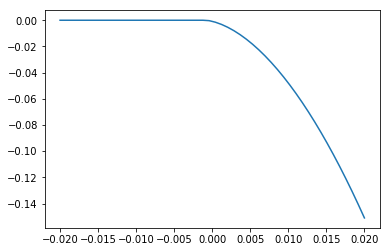

In [204]:
plt.plot(CHIV, FE36solV)
plt.show()

# find coefficients in free energy expansion

In [29]:
Q1 = np.array([1,0,0])
Q2 = -Q1
Qs = [Q1, Q2]

# simple melt case
B, C, D = 0, 0, 0
for Q1 in Qs:
    for Q2 in Qs:
        if norm(Q1+Q2) < 1e-10:
            B +=1

for Q1 in Qs:
    for Q2 in Qs:
        for Q3 in Qs:
            for Q4 in Qs:
                if norm(Q1+Q2+Q3+Q4) < 1e-10:
                    D += 1
print(B, C, D)

# solution case
B = np.zeros((2,2))
C = np.zeros((2,2,2))
D = np.zeros((2,2,2,2))
for I in range(2):
    for J in range(2):
        for Q1 in Qs:
            for Q2 in Qs:
                if norm(Q1+Q2) < 1e-10:
                    B[I][J] += 1

for I in range(2):
    for J in range(2):
        for K in range(2):
            for L in range(2):
                for Q1 in Qs:
                    for Q2 in Qs:
                        for Q3 in Qs:
                            for Q4 in Qs:
                                if norm(Q1+Q2+Q3+Q4) < 1e-10:
                                    D[I][J][K][L] += 1
print(B)
print(D)

2 0 6
[[ 2.  2.]
 [ 2.  2.]]
[[[[ 6.  6.]
   [ 6.  6.]]

  [[ 6.  6.]
   [ 6.  6.]]]


 [[[ 6.  6.]
   [ 6.  6.]]

  [[ 6.  6.]
   [ 6.  6.]]]]
